In [28]:
#pip install ipywidgets

In [64]:
import pandas as pd

# Load the CSV
df = pd.read_csv("/Users/JumpMan/Desktop/FM Scouting Report/PSG Save_ Summer 2024 - Summer 2024 Stats (1).csv")

# Drop completely empty columns
df = df.dropna(axis=1, how='all')

# Drop duplicate rows if any
df = df.drop_duplicates()

# If you see Unnamed columns, drop them
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Convert numeric-looking columns stored as text
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Preview cleaned data

/var/folders/bf/4lyx7mbx6_x3y4pb5d93fm7h0000gp/T/ipykernel_2010/1177221958.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/JumpMan/Desktop/FM Scouting Report/PSG Save_ Summer 2024 - Summer 2024 Stats (1).csv")


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11818 entries, 0 to 11817
Columns: 166 entries, UID to Aer
dtypes: float64(50), object(116)
memory usage: 15.0+ MB


In [13]:
df.head()

,UID,Name,Position,CA,PA,Av Rat,Starts,Age,Height,Weight,...,Cnt,Cmp,Com,Cmd,Bra,Bal,Ant,Agi,Agg,Aer
0,28060397,John Stones,"D (RC), DM",166.0,170.0,7.09,24.00,29.0,"6'2""",158 lbs,...,16.0,18.0,4.0,2.0,17.0,12.0,16.0,13.0,13.0,1.0
1,19351309,Gabriel Martinelli,"AM (RL), ST (C)",168.0,180.0,7.34,39.00,22.0,"5'11""",158 lbs,...,13.0,14.0,3.0,1.0,14.0,15.0,13.0,16.0,14.0,2.0
2,28106491,Declan Rice,"D (C), DM, M (C)",181.0,182.0,7.27,45.00,25.0,"6'1""",176 lbs,...,17.0,17.0,1.0,3.0,15.0,14.0,18.0,13.0,13.0,1.0
3,53095137,Martin Ødegaard,M/AM (C),179.0,180.0,7.26,42.00,25.0,"5'10""",149 lbs,...,15.0,16.0,3.0,1.0,10.0,15.0,18.0,17.0,8.0,3.0
4,43124203,Bruno Fernandes,"M (C), AM (RC), ST (C)",171.0,174.0,7.28,44.00,29.0,"5'10""",152 lbs,...,13.0,14.0,3.0,3.0,17.0,13.0,17.0,15.0,18.0,1.0


## Attribute Analysis


In [6]:
attribute_cols = ['1v1',
       'Acc', 'Aer', 'Agg', 'Agi', 'Ant', 'Bal', 'Bra', 'Cmd', 'Cnt', 'Cmp',
       'Cro', 'Dec', 'Det', 'Dri', 'Fir', 'Fin', 'Fla', 'Han', 'Hea', 'Jum',
       'Kic', 'Ldr', 'Lon', 'Mar', 'OtB', 'Pac', 'Pas', 'Pos', 'Ref', 'Sta',
       'Str', 'Tck', 'Tea', 'Tec', 'Thr', 'TRO', 'Vis', 'Wor', 'Cor', 'Height',
       'Av Rat', 'CA', 'PA', 'Weight']


In [7]:
# Convert attribute columns to numeric (if necessary)
df[attribute_cols] = df[attribute_cols].apply(pd.to_numeric, errors='coerce')

# Calculate average
df['Attribute Average'] = df[attribute_cols].mean(axis=1)

# Sort by top players
df_sorted = df.sort_values(by='Attribute Average', ascending=False)

# Preview
df_sorted[['Name', 'Club', 'Position', 'Av Rat',  'CA', 'PA', 'Attribute Average']].head(10)


,Name,Club,Position,Av Rat,CA,PA,Attribute Average
11649,Jude Bellingham,R. Madrid,"DM, M/AM (C)",7.33,188.0,188.0,20.914651
11651,Erling Haaland,Man City,ST (C),7.34,194.0,195.0,20.659070
11610,Ederson,Man City,GK,7.10,180.0,180.0,20.513953
11774,Manuel Neuer,FC Bayern,GK,7.07,152.0,193.0,20.257442
11726,Kevin De Bruyne,Man City,"M (RLC), AM (C)",7.31,189.0,190.0,20.123488
20,Harry Kane,FC Bayern,"AM (C), ST (C)",7.29,184.0,185.0,20.123023
2,Declan Rice,Arsenal,"D (C), DM, M (C)",7.27,181.0,182.0,20.099302
13,Vinícius Júnior,R. Madrid,"M (L), AM (RL), ST (C)",7.22,190.0,190.0,20.028372
11715,Alisson,Liverpool,GK,7.03,176.0,180.0,19.930930
7,Bukayo Saka,Arsenal,AM (RL),7.36,184.0,186.0,19.892093


In [8]:
import ipywidgets as widgets
from IPython.display import display, clear_output
# Convert attributes to numeric and compute average
df[attribute_cols] = df[attribute_cols].apply(pd.to_numeric, errors='coerce')
df['Attribute Average'] = df[attribute_cols].mean(axis=1)
df_sorted = df.sort_values(by='Attribute Average', ascending=False)

# Normalize position strings
df['Position_Lower'] = df['Position'].str.lower()

# Extract unique positions
all_positions = set()
for pos_str in df['Position_Lower'].dropna():
    for pos in pos_str.split(','):
        all_positions.add(pos.strip())

position_list = sorted(list(all_positions))

# Create widgets
position_dropdown = widgets.Dropdown(
    options=position_list,
    description='Position:',
    layout=widgets.Layout(width='50%')
)

quit_button = widgets.Button(
    description='Quit',
    button_style='danger',
    layout=widgets.Layout(width='20%')
)

output = widgets.Output()

# Callback function
def show_top_players(change):
    with output:
        clear_output()
        selected_pos = position_dropdown.value
        matching_players = df[df['Position_Lower'].str.contains(selected_pos, na=False, regex=False)]
        if not matching_players.empty:
            top_pos_players = matching_players.sort_values(by='Attribute Average', ascending=False).head(10)
            print(f"\nTop 10 players for position '{selected_pos.upper()}':")
            display(top_pos_players[['Name', 'Club', 'Position', 'Transfer Value','Av Rat',  'CA', 'PA', 'Attribute Average']])
        else:
            print("No players found for that position.")

def quit_program(change):
    with output:
        clear_output()
        print("Exited program.")

# Bind events
position_dropdown.observe(show_top_players, names='value')
quit_button.on_click(quit_program)

# Display widgets
display(widgets.HBox([position_dropdown, quit_button]), output)

Output()

In [14]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import plotly.graph_objects as go

# Load your dataset
df = pd.read_csv("/Users/JumpMan/Desktop/23_24_att_analysis.csv")

# --- Preprocessing ---
attribute_cols = df.select_dtypes(include=['number']).columns.tolist()      
df[attribute_cols] = df[attribute_cols].apply(pd.to_numeric, errors='coerce')
df['Attribute Average'] = df[attribute_cols].mean(axis=1)
df['Position_Lower'] = df['Position'].str.lower()

# Unique positions and clubs
all_positions = set()
for pos_str in df['Position_Lower'].dropna():
    for pos in pos_str.split(','):
        all_positions.add(pos.strip())
position_list = [''] + sorted(list(all_positions))
club_list = [''] + sorted(df['Club'].dropna().unique().tolist())

# --- Widgets ---
position_dropdown = widgets.Dropdown(
    options=position_list,
    description='Position:',
    layout=widgets.Layout(width='40%')
)

club_dropdown = widgets.Dropdown(
    options=club_list,
    description='Club:',
    layout=widgets.Layout(width='40%')
)

quit_button = widgets.Button(
    description='Quit',
    button_style='danger',
    layout=widgets.Layout(width='20%')
)

search_bar = widgets.Text(
    placeholder='Enter player name...',
    description='Search:',
    layout=widgets.Layout(width='60%')
)

go_button = widgets.Button(
    description='Go',
    button_style='primary',
    layout=widgets.Layout(width='10%')
)

output = widgets.Output()

# --- Core Functions ---
def find_similar_players(player_name, top_n=5):
    with output:
        clear_output()
        if player_name not in df['Name'].values:
            print(f"No player named '{player_name}' found.")
            return

        player_row = df[df['Name'] == player_name]
        player_attrs = player_row[attribute_cols].iloc[0]
        top_10_attrs = player_attrs.sort_values(ascending=False).dropna().head(10).index.tolist()

        if len(top_10_attrs) < 3:
            print(f"Player '{player_name}' does not have enough valid attribute values.")
            return

        valid_df = df.dropna(subset=top_10_attrs)
        player_vector = player_row[top_10_attrs].values
        all_vectors = valid_df[top_10_attrs].values

        similarities = cosine_similarity(player_vector, all_vectors)[0]
        valid_df['Similarity'] = similarities
        top_similar = valid_df[valid_df['Name'] != player_name].sort_values(by='Similarity', ascending=False).head(top_n)

        player_row = player_row.copy()
        player_row['Similarity'] = 1.0
        combined = pd.concat([player_row, top_similar], ignore_index=True)

        print(f"\nTop {top_n} players similar to {player_name} based on top 10 attributes (including {player_name}):")
        display(combined[['Name', 'Club', 'Position', 'Attribute Average', 'Transfer Value', 'Similarity'] + top_10_attrs])

        fig = go.Figure()
        fig.add_trace(go.Bar(x=top_10_attrs, y=player_row[top_10_attrs].values.flatten(), name=player_name))

        for _, row in top_similar.iterrows():
            fig.add_trace(go.Bar(x=top_10_attrs, y=row[top_10_attrs].values, name=row['Name']))

        fig.update_layout(
            barmode='group',
            title=f"Top 10 Attributes Comparison: {player_name} vs Similar Players",
            xaxis_title="Attributes",
            yaxis_title="Value",
            height=500,
            hovermode="x unified"
        )
        fig.show()


def show_top_players(change):
    with output:
        clear_output()
        selected_pos = position_dropdown.value
        selected_club = club_dropdown.value

        if selected_pos == '':
            print("Please select a position to see top players.")
            return

        matching_players = df[df['Position_Lower'].str.contains(selected_pos, na=False, regex=False)]
        if selected_club:
            matching_players = matching_players[matching_players['Club'] == selected_club]

        if not matching_players.empty:
            top_pos_players = matching_players.sort_values(by='Attribute Average', ascending=False).head(10)
            print(f"\nTop 10 players for position '{selected_pos.upper()}'" +
                  (f" and club '{selected_club}'" if selected_club else "") + ":")

            for _, row in top_pos_players.iterrows():
                name_copy = row['Name']
                btn = widgets.Button(description=name_copy, layout=widgets.Layout(width='30%', margin='2px'))
                btn.on_click(lambda b, name=name_copy: find_similar_players(name))
                display(btn)

            display(top_pos_players[['Name', 'Club', 'Position', 'Attribute Average', 'Transfer Value']])
        else:
            print("No players found for that position and club.")


def on_quit(change):
    with output:
        clear_output()
        print("Exited program.")


def on_search_submit(change):
    player_name = search_bar.value.strip()
    if player_name:
        find_similar_players(player_name)


def on_go_button_clicked(change):
    player_name = search_bar.value.strip()
    if player_name:
        find_similar_players(player_name)

# --- Event Bindings ---
position_dropdown.observe(show_top_players, names='value')
club_dropdown.observe(show_top_players, names='value')
quit_button.on_click(on_quit)
search_bar.on_submit(on_search_submit)
go_button.on_click(on_go_button_clicked)

# --- Display UI ---
display(widgets.HBox([position_dropdown, club_dropdown, quit_button]))
display(widgets.HBox([search_bar, go_button]))
display(output)

/var/folders/bf/4lyx7mbx6_x3y4pb5d93fm7h0000gp/T/ipykernel_72176/99751669.py:157: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  search_bar.on_submit(on_search_submit)


Output()

## Potential and attribute correlation analysis

/var/folders/bf/4lyx7mbx6_x3y4pb5d93fm7h0000gp/T/ipykernel_72176/3641041690.py:9: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



Numeric columns used for correlation:
['CA', 'PA', 'Age', 'Acc', 'Wor', 'Vis', 'Thr', 'Tec', 'Tea', 'Tck', 'Str', 'Sta', 'TRO', 'Ref', 'Pun', 'Pos', 'Pen', 'Pas', 'Pac', '1v1', 'OtB', 'Nat.1', 'Mar', 'L Th', 'Lon', 'Ldr', 'Kic', 'Jum', 'Hea', 'Han', 'Fre', 'Fla', 'Fir', 'Fin', 'Ecc', 'Dri', 'Det', 'Dec', 'Cro', 'Cor', 'Cnt', 'Cmp', 'Com', 'Cmd', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Aer']


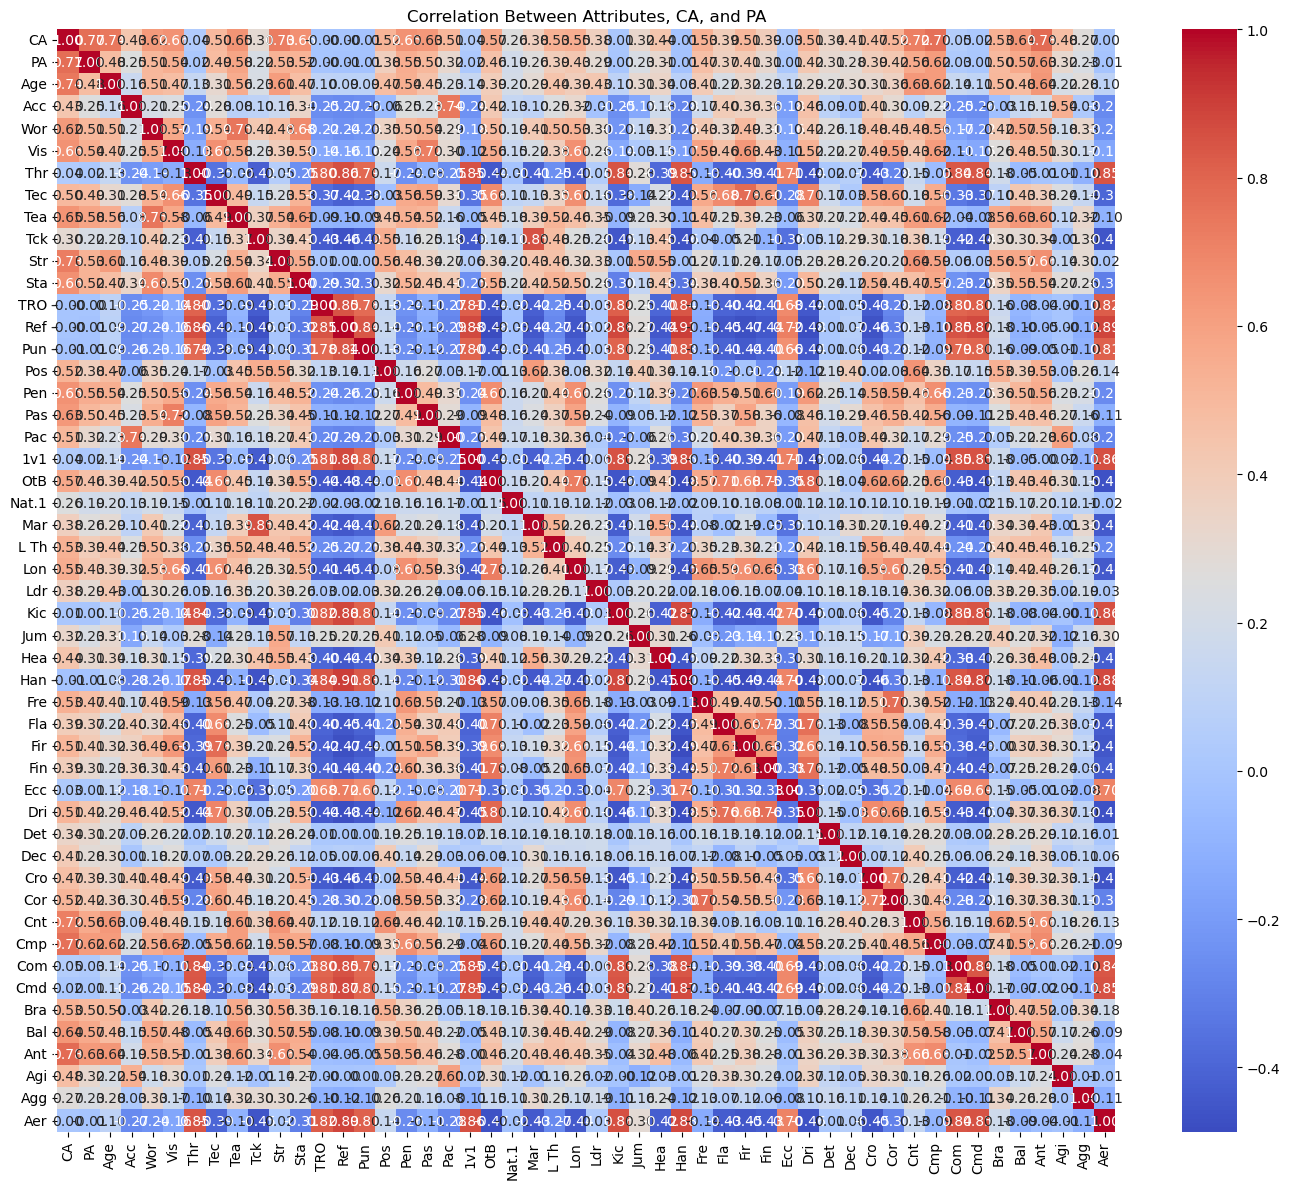

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load the data
# -----------------------------
file_path = "/Users/JumpMan/Desktop/FM Scouting Report/PSG Save_ Summer 2024 - Summer 2024 Stats (1).csv"
df = pd.read_csv(file_path)

# -----------------------------
# 2. Initial cleaning
# -----------------------------

# Drop completely empty columns
df = df.dropna(axis=1, how='all')

# Drop duplicate rows
df = df.drop_duplicates()

# Drop unnamed columns (e.g., index columns)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# -----------------------------
# 3. Convert columns to numeric where possible
# -----------------------------
df = df.apply(pd.to_numeric, errors="ignore")

# -----------------------------
# 4. Select only numeric columns (attributes, CA, PA)
# -----------------------------
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

print("Numeric columns used for correlation:")
print(list(df_numeric.columns))

# -----------------------------
# 5. Compute correlation matrix
# -----------------------------
correlation_matrix = df_numeric.corr()

# -----------------------------
# 6. Display correlation matrix as heatmap
# -----------------------------
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Between Attributes, CA, and PA")
plt.tight_layout()
plt.show()

/var/folders/bf/4lyx7mbx6_x3y4pb5d93fm7h0000gp/T/ipykernel_72176/3719939621.py:9: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



Numeric columns used for correlation:
['CA', 'PA', 'Age', 'Acc', 'Wor', 'Vis', 'Thr', 'Tec', 'Tea', 'Tck', 'Str', 'Sta', 'TRO', 'Ref', 'Pun', 'Pos', 'Pen', 'Pas', 'Pac', '1v1', 'OtB', 'Nat.1', 'Mar', 'L Th', 'Lon', 'Ldr', 'Kic', 'Jum', 'Hea', 'Han', 'Fre', 'Fla', 'Fir', 'Fin', 'Ecc', 'Dri', 'Det', 'Dec', 'Cro', 'Cor', 'Cnt', 'Cmp', 'Com', 'Cmd', 'Bra', 'Bal', 'Ant', 'Agi', 'Agg', 'Aer']


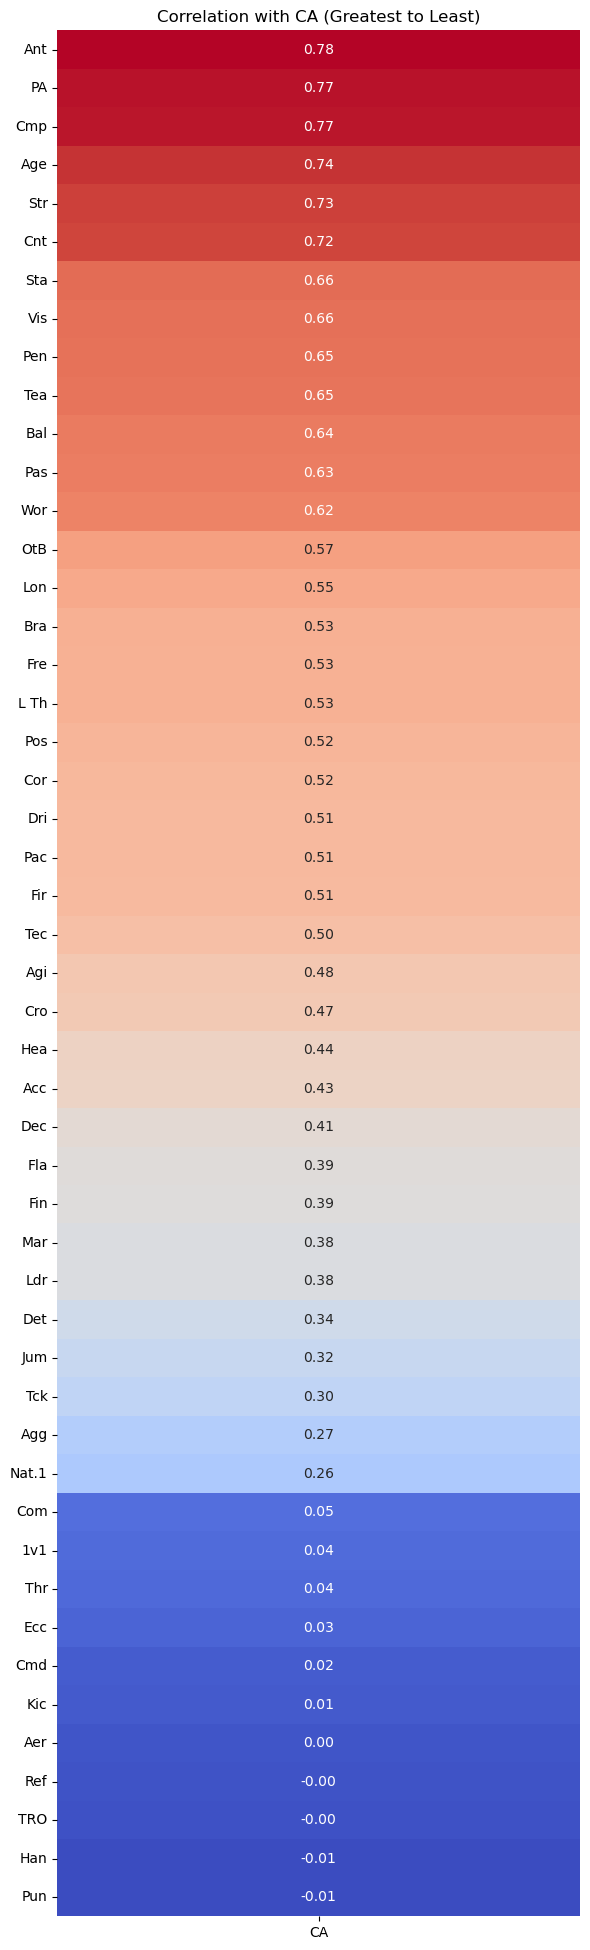

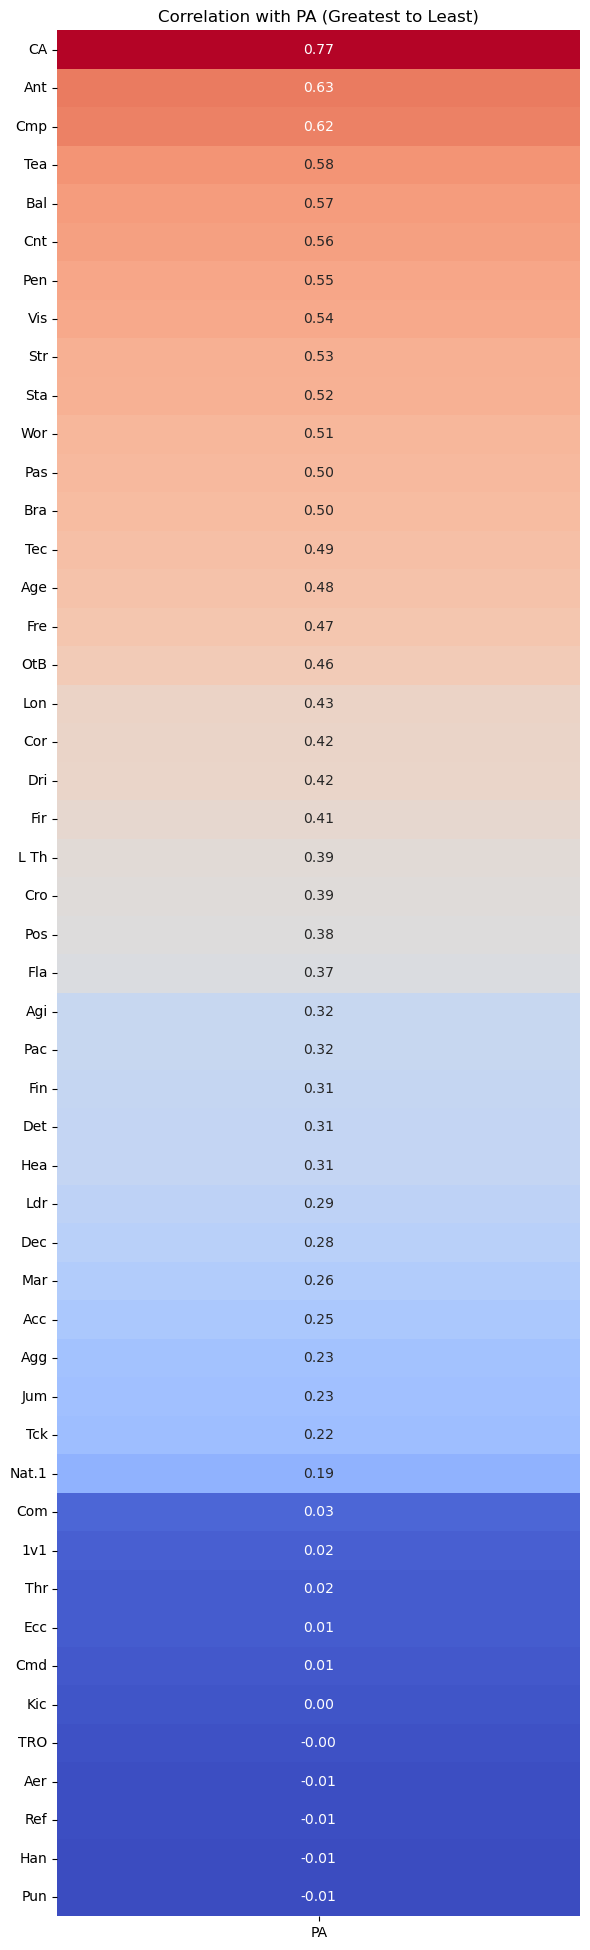

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load the data
# -----------------------------
file_path = "/Users/JumpMan/Desktop/FM Scouting Report/PSG Save_ Summer 2024 - Summer 2024 Stats (1).csv"
df = pd.read_csv(file_path)

# -----------------------------
# 2. Initial cleaning
# -----------------------------
df = df.dropna(axis=1, how='all')
df = df.drop_duplicates()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.strip()

# -----------------------------
# 3. Convert columns to numeric where possible
# -----------------------------
df = df.apply(pd.to_numeric, errors="ignore")

# -----------------------------
# 4. Select only numeric columns (attributes, CA, PA)
# -----------------------------
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

print("Numeric columns used for correlation:")
print(list(df_numeric.columns))

# -----------------------------
# 5. Compute correlation matrix
# -----------------------------
correlation_matrix = df_numeric.corr()

# -----------------------------
# 6. Extract correlations with CA and PA
# -----------------------------
if "CA" in correlation_matrix.columns:
    corr_with_CA = correlation_matrix["CA"].drop("CA").sort_values(ascending=False)
    plt.figure(figsize=(6, len(corr_with_CA) * 0.4))
    sns.heatmap(
        corr_with_CA.to_frame(),
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        cbar=False
    )
    plt.title("Correlation with CA (Greatest to Least)")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'CA' not found in the data.")

if "PA" in correlation_matrix.columns:
    corr_with_PA = correlation_matrix["PA"].drop("PA").sort_values(ascending=False)
    plt.figure(figsize=(6, len(corr_with_PA) * 0.4))
    sns.heatmap(
        corr_with_PA.to_frame(),
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        cbar=False
    )
    plt.title("Correlation with PA (Greatest to Least)")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'PA' not found in the data.")

## Team and league strength

### Average Attributes per team

In [7]:
from IPython.display import display, HTML, clear_output
import pandas as pd
import ipywidgets as widgets

# -----------------------------
# Load and clean data
# -----------------------------
file_path = "/Users/JumpMan/Desktop/FM Scouting Report/PSG Save_ Summer 2024 - Summer 2024 Stats (1).csv"
df = pd.read_csv(file_path)
df = df.dropna(axis=1, how='all').drop_duplicates()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.strip()
df = df.apply(pd.to_numeric, errors="ignore")

# -----------------------------
# Define columns
# -----------------------------
team_col = "Club"
league_col = "Division"
position_col = "Position"
name_col = "Name" if "Name" in df.columns else None

gk_attributes = ["Aerial Reach", "Command of Area", "Communication", "Eccentricity", 
                 "First Touch", "Handling", "Kicking", "One on Ones", "Passing", 
                 "Punching (Tendency)", "Reflexes", "Rushing Out", "Tendency to Punch", 
                 "Throwing"]

numeric_cols = df.select_dtypes(include=["number"]).columns
attributes_only = [c for c in numeric_cols if c not in ["CA", "PA", "Age"] + gk_attributes]

df["Average Attribute"] = df[attributes_only].mean(axis=1).round(2)

# -----------------------------
# Widgets
# -----------------------------
team_options = ["All Teams"] + sorted(df[team_col].dropna().unique())
league_options = ["All Leagues"] + sorted(df[league_col].dropna().unique())
position_options = ["All Positions"] + sorted(df[position_col].dropna().unique())

team_dropdown = widgets.Dropdown(options=team_options, description="Team:")
league_dropdown = widgets.Dropdown(options=league_options, description="League:")
position_dropdown = widgets.Dropdown(options=position_options, description="Position:")
min_avg_slider = widgets.FloatSlider(value=10, min=1, max=20, step=0.1, description="Min Avg Attr:")

team_selector = widgets.Select(
    options=[],
    description="Select Team:",
    rows=10,
    layout=widgets.Layout(width='40%')
)

player_selector = widgets.Select(
    options=[],
    description="Select Player:",
    rows=11,
    layout=widgets.Layout(width='40%')
)

output_main = widgets.Output()
output_players = widgets.Output()
output_player_details = widgets.Output()

# -----------------------------
# Filtering logic
# -----------------------------
def update_filtered_table(change):
    output_main.clear_output()
    output_players.clear_output()
    output_player_details.clear_output()
    player_selector.options = []

    filtered_df = df.copy()

    if team_dropdown.value != "All Teams":
        filtered_df = filtered_df[filtered_df[team_col] == team_dropdown.value]
    
    if league_dropdown.value != "All Leagues":
        filtered_df = filtered_df[filtered_df[league_col] == league_dropdown.value]

    if position_dropdown.value != "All Positions":
        filtered_df = filtered_df[filtered_df[position_col] == position_dropdown.value]
    
    filtered_df = filtered_df[filtered_df["Average Attribute"] >= min_avg_slider.value]

    if filtered_df.empty:
        with output_main:
            print("No players match the selected criteria.")
        team_selector.options = []
        return

    # Compute team-level averages and ranks
    team_avg = (
        filtered_df
        .groupby([team_col, league_col])[attributes_only + ["Average Attribute"]]
        .mean()
        .round(2)
        .reset_index()
    )
    team_avg["Overall Rank"] = team_avg["Average Attribute"].rank(ascending=False, method="min").astype(int)
    team_avg["League Rank"] = team_avg.groupby(league_col)["Average Attribute"].rank(ascending=False, method="min").astype(int)
    team_avg_sorted = team_avg.sort_values(by="Overall Rank")

    with output_main:
        display(HTML("<h3 style='color:#2c3e50'>🏆 Ranked Teams</h3>"))
        display(team_avg_sorted.set_index("Overall Rank"))

    # Update selector widget with teams
    team_selector.options = [f"{row['Overall Rank']}. {row[team_col]} ({row[league_col]})"
                             for _, row in team_avg_sorted.iterrows()]

# -----------------------------
# Show top 11 players when a team is selected
# -----------------------------
def on_team_selected(change):
    output_players.clear_output()
    output_player_details.clear_output()
    player_selector.options = []

    if not change.new:
        return

    selection_text = change.new
    rank_dot, rest = selection_text.split(".", 1)
    club_name = rest.strip().split("(")[0].strip()

    top_players = (
        df[df[team_col] == club_name]
        .sort_values(by="Average Attribute", ascending=False)
        .head(11)
    )

    with output_players:
        display(HTML(f"<h3 style='color:#2980b9'>Top 11 Players for {club_name}</h3>"))
        cols_to_show = [name_col] if name_col else []
        cols_to_show += [position_col, "Age", "CA", "PA", "Average Attribute"]
        cols_to_show += attributes_only[:6]
        display(top_players[cols_to_show].reset_index(drop=True))

    # Update player selector
    if name_col:
        player_selector.options = [
            f"{i+1}. {row[name_col]} (Avg: {row['Average Attribute']})"
            for i, row in top_players.reset_index().iterrows()
        ]
        # Store dataframe for lookup
        player_selector.df_lookup = top_players.reset_index(drop=True)

# -----------------------------
# Show full attributes for a selected player
# -----------------------------
def on_player_selected(change):
    output_player_details.clear_output()
    if not change.new:
        return

    idx_str, rest = change.new.split(".", 1)
    idx = int(idx_str.strip()) - 1

    with output_player_details:
        player_row = player_selector.df_lookup.iloc[idx]
        display(HTML(
            f"<h3 style='color:#27ae60'>Full Attributes for {player_row[name_col] if name_col else 'Player'}</h3>"
        ))
        display(player_row.to_frame().T)

# -----------------------------
# Observers
# -----------------------------
for w in [team_dropdown, league_dropdown, position_dropdown, min_avg_slider]:
    w.observe(update_filtered_table, names="value")

team_selector.observe(on_team_selected, names="value")
player_selector.observe(on_player_selected, names="value")

# -----------------------------
# Display UI
# -----------------------------
print("▶ Interactive Team and Player Explorer")
ui = widgets.VBox([
    widgets.HBox([team_dropdown, league_dropdown, position_dropdown, min_avg_slider]),
    output_main,
    widgets.HTML("<h4>Select a team to view its top players:</h4>"),
    team_selector,
    output_players,
    widgets.HTML("<h4>Select a player for full attributes:</h4>"),
    player_selector,
    output_player_details
])
display(ui)

update_filtered_table(None)


/var/folders/bf/4lyx7mbx6_x3y4pb5d93fm7h0000gp/T/ipykernel_2010/694451482.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


▶ Interactive Team and Player Explorer


### CA, PA, Attribute Average Matrix

In [8]:
# Ensure you have already created df["Average Attribute"]

# Select relevant columns
correlation_df = df[["CA", "PA", "Average Attribute"]]

# Compute Pearson correlation matrix
correlation_matrix = correlation_df.corr(method="pearson").round(3)

# Display nicely
from IPython.display import display, HTML
display(HTML("<h3 style='color:#2c3e50'>🔍 Correlation Matrix</h3>"))
display(correlation_matrix)


,CA,PA,Average Attribute
CA,1.000,0.770,0.942
PA,0.770,1.000,0.751
Average Attribute,0.942,0.751,1.000


## Team and Player Attribute search

In [47]:
from IPython.display import display, HTML, clear_output
import pandas as pd
import ipywidgets as widgets

# -----------------------------
# Load and clean data
# -----------------------------
file_path = "/Users/JumpMan/Desktop/FM Scouting Report/PSG Save_ Summer 2024 - Summer 2024 Stats (1).csv"
df = pd.read_csv(file_path, low_memory=False)
df = df.dropna(axis=1, how='all').drop_duplicates()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.strip()
df = df.apply(pd.to_numeric, errors="ignore")

# -----------------------------
# Define columns
# -----------------------------
team_col = "Club"
position_col = "Position"
league_col = "Division" if "Division" in df.columns else None
name_col = "Name" if "Name" in df.columns else None

# -----------------------------
# Position classification function
# -----------------------------
def classify_position(pos):
    if not isinstance(pos, str):
        return "Unknown"
    p = pos.replace(" ", "").upper()
    if "GK" in p:
        return "Goalkeeper"
    for key in ["D(", "WB", "SW", "D/", "WB/", "WB/M", "WB/M/AM"]:
        if key in p:
            return "Defender"
    for key in ["ST", "CF", "AF"]:
        if key in p:
            return "Attacker"
    for key in ["DM", "M", "AM"]:
        if key in p and "ST" not in p:
            return "Midfielder"
    return "Unknown"

df["Role"] = df[position_col].apply(classify_position)

# -----------------------------
# Attribute lists
# -----------------------------
defender_attrs = ["Tck", "Mar", "Pos", "Bra", "Hea", "Str", "Jum"]
midfielder_attrs = ["Pas", "Vis", "Tea", "Wor", "Fir", "Com", "Dec"]
attacker_attrs = ["Fin", "Dri", "Tec", "Acc", "Pac", "OtB", "Agi"]
goalkeeper_attrs = ["Aer", "Cmd", "Com", "Ecc", "Fir", "Han", "Kic", "1v1", "Pas", "Pun", "Ref", "Thr"]

# -----------------------------
# Helper function
# -----------------------------
def average_attributes(row, attrs):
    relevant = [a for a in attrs if a in df.columns]
    if len(relevant) == 0:
        return float('nan')
    return row[relevant].mean()

# -----------------------------
# Compute player-specific role averages
# -----------------------------
df["Defender Avg"] = df.apply(lambda r: average_attributes(r, defender_attrs), axis=1).round(2)
df["Midfielder Avg"] = df.apply(lambda r: average_attributes(r, midfielder_attrs), axis=1).round(2)
df["Attacker Avg"] = df.apply(lambda r: average_attributes(r, attacker_attrs), axis=1).round(2)
df["Goalkeeper Avg"] = df.apply(lambda r: average_attributes(r, goalkeeper_attrs), axis=1).round(2)

# -----------------------------
# Compute team-level role averages
# -----------------------------
group_cols = [team_col, "Role"]
if league_col:
    group_cols.insert(1, league_col)

team_role_avg_df = (
    df.groupby(group_cols)[
        ["Defender Avg", "Midfielder Avg", "Attacker Avg", "Goalkeeper Avg"]
    ]
    .mean()
    .round(2)
    .reset_index()
)

# -----------------------------
# Display initial team averages
# -----------------------------
#display(HTML("<h3 style='color:#2c3e50'>🧠 Team Average Attributes by Role (All)</h3>"))
#display(team_role_avg_df.sort_values([team_col, "Role"]))

# -----------------------------
# Create widgets for player table
# -----------------------------
team_options = sorted(df[team_col].dropna().unique())
league_options = sorted(df[league_col].dropna().unique()) if league_col else []
role_options = ["Goalkeeper", "Defender", "Midfielder", "Attacker"]

team_dropdown = widgets.Dropdown(
    options=["(All)"] + team_options,
    description="Team:",
    layout=widgets.Layout(width="300px")
)

league_dropdown = widgets.Dropdown(
    options=["(All)"] + league_options if league_col else ["(All)"],
    description="League:",
    layout=widgets.Layout(width="300px")
)

role_dropdown = widgets.Dropdown(
    options=["(All)"] + role_options,
    description="Role:",
    layout=widgets.Layout(width="300px")
)

output = widgets.Output()

# -----------------------------
# Callback function for player table
# -----------------------------
def update_table(change=None):
    with output:
        clear_output()
        filtered_df = df.copy()
        if team_dropdown.value != "(All)":
            filtered_df = filtered_df[filtered_df[team_col] == team_dropdown.value]
        if league_col and league_dropdown.value != "(All)":
            filtered_df = filtered_df[filtered_df[league_col] == league_dropdown.value]
        if role_dropdown.value != "(All)":
            filtered_df = filtered_df[filtered_df["Role"] == role_dropdown.value]

        sort_col = {
            "Goalkeeper": "Goalkeeper Avg",
            "Defender": "Defender Avg",
            "Midfielder": "Midfielder Avg",
            "Attacker": "Attacker Avg",
        }.get(role_dropdown.value, "Defender Avg")

        display(HTML("<h3 style='color:#2c3e50'>🎯 Filtered Players</h3>"))
        display(
            filtered_df[
                ([name_col] if name_col else [])
                + [team_col, position_col, "Role", "Defender Avg", "Midfielder Avg", "Attacker Avg", "Goalkeeper Avg"]
            ].sort_values(by=sort_col, ascending=False).head(50)
        )

# -----------------------------
# Create widgets for team averages table
# -----------------------------
team_avg_team_dropdown = widgets.Dropdown(
    options=["(All)"] + team_options,
    description="Team:",
    layout=widgets.Layout(width="300px")
)

team_avg_league_dropdown = widgets.Dropdown(
    options=["(All)"] + league_options if league_col else ["(All)"],
    description="League:",
    layout=widgets.Layout(width="300px")
)

team_avg_role_dropdown = widgets.Dropdown(
    options=["(All)"] + role_options,
    description="Role:",
    layout=widgets.Layout(width="300px")
)

team_avg_output = widgets.Output()

# -----------------------------
# Callback function for team averages table
# -----------------------------
def update_team_avg_table(change=None):
    with team_avg_output:
        clear_output()
        data = team_role_avg_df.copy()

        if team_avg_team_dropdown.value != "(All)":
            data = data[data[team_col] == team_avg_team_dropdown.value]
        if league_col and team_avg_league_dropdown.value != "(All)":
            data = data[data[league_col] == team_avg_league_dropdown.value]
        if team_avg_role_dropdown.value != "(All)":
            data = data[data["Role"] == team_avg_role_dropdown.value]

        if team_avg_role_dropdown.value != "(All)":
            sort_col = f"{team_avg_role_dropdown.value} Avg"
        else:
            sort_col = "Defender Avg"

        display(HTML("<h3 style='color:#2c3e50'>🏆 Filtered Team Role Averages</h3>"))
        display(data.sort_values(by=sort_col, ascending=False))

# -----------------------------
# Set up observers
# -----------------------------
team_dropdown.observe(update_table, names="value")
league_dropdown.observe(update_table, names="value")
role_dropdown.observe(update_table, names="value")

team_avg_team_dropdown.observe(update_team_avg_table, names="value")
team_avg_league_dropdown.observe(update_team_avg_table, names="value")
team_avg_role_dropdown.observe(update_team_avg_table, names="value")

# -----------------------------
# Display widgets and outputs
# -----------------------------
display(HTML("<h3 style='color:#2980b9'>🎮 Filter Players</h3>"))
if league_col:
    display(widgets.HBox([team_dropdown, league_dropdown, role_dropdown]))
else:
    display(widgets.HBox([team_dropdown, role_dropdown]))
display(output)
update_table()

display(HTML("<h3 style='color:#2980b9'>🏆 Filter Team Averages</h3>"))
if league_col:
    display(widgets.HBox([team_avg_team_dropdown, team_avg_league_dropdown, team_avg_role_dropdown]))
else:
    display(widgets.HBox([team_avg_team_dropdown, team_avg_role_dropdown]))
display(team_avg_output)
update_team_avg_table()


Output()

Output()

# Statistical Analysis 

In [23]:
# Print all column names
print("Column Names:")
for col in df.columns:
    print(col)

Column Names:
UID
Name
Position
CA
PA
Av Rat
Starts
Age
Height
Weight
Club
Division
Nat
2nd Nat
Home Grown Status
Personality
Media Handling
Salary
Transfer Value
Asking Price
Preferred Foot
Yel
xG
Red
PoM
Pen/R
Pens S
Pens Saved Ratio
Pens Saved
Pens Faced
Pens
Mins
Gls/90
Conc
Gls
Fls
FA
xG/90
xG-OP
xA/90
xA
All/90
Shutouts
Mins/Gl
Ast
Hdrs A
Apps
Tck/90
Tck C
Tck A
Tck R
Shot/90
Shot %
ShT/90
ShT
Shots Outside Box/90
Shts Blckd/90
Shts Blckd
Shots
Svt
Svp
Svh
Sv %
Pr passes/90
Pr Passes
Pres C/90
Pres C
Pres A/90
Pres A
Poss Won/90
Poss Lost/90
Ps C/90
Ps C
Ps A/90
Pas A
Pas %
OP-KP/90
OP-KP
OP-Crs C/90
OP-Crs C
OP-Crs A/90
OP-Crs A
OP-Cr %
Off
Gl Mst
K Tck/90
K Tck
K Ps/90
K Pas
K Hdrs/90
Int/90
Itc
Sprints/90
Hdr %
Hdrs W/90
Hdrs
Hdrs L/90
Goals Outside Box
xSv %
xGP/90
xGP
Drb/90
Drb
Dist/90
Distance
Cr C/90
Cr C
Crs A/90
Cr A
Cr C/A
Conv %
Clr/90
Clear
CCC
Ch C/90
Blk/90
Blk
Asts/90
Aer A/90
Acc
Wor
Vis
Thr
Tec
Tea
Tck
Str
Sta
TRO
Ref
Pun
Pos
Pen
Pas
Pac
1v1
OtB
Nat.1
Mar
L Th
L

In [24]:
stat_cols = [
    "Yel", "xG", "Red", "PoM", "Pen/R", "Pens S", "Pens Saved Ratio", "Pens Saved", "Pens Faced", "Pens",
    "Mins", "Gls/90", "Conc", "Gls", "Fls", "FA", "xG/90", "xG-OP", "xA/90", "xA", "All/90",
    "Shutouts", "Mins/Gl", "Ast", "Hdrs A", "Apps", "Tck/90", "Tck C", "Tck A", "Tck R", "Shot/90",
    "Shot %", "ShT/90", "ShT", "Shots Outside Box/90", "Shts Blckd/90", "Shts Blckd", "Shots",
    "Svt", "Svp", "Svh", "Sv %", "Pr passes/90", "Pr Passes", "Pres C/90", "Pres C", "Pres A/90", "Pres A",
    "Poss Won/90", "Poss Lost/90", "Ps C/90", "Ps C", "Ps A/90", "Pas A", "Pas %", "OP-KP/90", "OP-KP",
    "OP-Crs C/90", "OP-Crs C", "OP-Crs A/90", "OP-Crs A", "OP-Cr %", "Off", "Gl Mst", "K Tck/90", "K Tck",
    "K Ps/90", "K Pas", "K Hdrs/90", "Int/90", "Itc", "Sprints/90", "Hdr %", "Hdrs W/90", "Hdrs",
    "Hdrs L/90", "Goals Outside Box", "xSv %", "xGP/90", "xGP", "Drb/90", "Drb", "Dist/90", "Distance",
    "Cr C/90", "Cr C", "Crs A/90", "Cr A", "Cr C/A", "Conv %", "Clr/90", "Clear", "CCC", "Ch C/90",
    "Blk/90", "Blk", "Asts/90", "Aer A/90"
]

available_stats = [c for c in stat_cols if c in df.columns]
missing_stats = [c for c in stat_cols if c not in df.columns]

print("✅ Available Stats:", available_stats)
print("❌ Missing Stats:", missing_stats)


✅ Available Stats: ['Yel', 'xG', 'Red', 'PoM', 'Pen/R', 'Pens S', 'Pens Saved Ratio', 'Pens Saved', 'Pens Faced', 'Pens', 'Mins', 'Gls/90', 'Conc', 'Gls', 'Fls', 'FA', 'xG/90', 'xG-OP', 'xA/90', 'xA', 'All/90', 'Shutouts', 'Mins/Gl', 'Ast', 'Hdrs A', 'Apps', 'Tck/90', 'Tck C', 'Tck A', 'Tck R', 'Shot/90', 'Shot %', 'ShT/90', 'ShT', 'Shots Outside Box/90', 'Shts Blckd/90', 'Shts Blckd', 'Shots', 'Svt', 'Svp', 'Svh', 'Sv %', 'Pr passes/90', 'Pr Passes', 'Pres C/90', 'Pres C', 'Pres A/90', 'Pres A', 'Poss Won/90', 'Poss Lost/90', 'Ps C/90', 'Ps C', 'Ps A/90', 'Pas A', 'Pas %', 'OP-KP/90', 'OP-KP', 'OP-Crs C/90', 'OP-Crs C', 'OP-Crs A/90', 'OP-Crs A', 'OP-Cr %', 'Off', 'Gl Mst', 'K Tck/90', 'K Tck', 'K Ps/90', 'K Pas', 'K Hdrs/90', 'Int/90', 'Itc', 'Sprints/90', 'Hdr %', 'Hdrs W/90', 'Hdrs', 'Hdrs L/90', 'Goals Outside Box', 'xSv %', 'xGP/90', 'xGP', 'Drb/90', 'Drb', 'Dist/90', 'Distance', 'Cr C/90', 'Cr C', 'Crs A/90', 'Cr A', 'Cr C/A', 'Conv %', 'Clr/90', 'Clear', 'CCC', 'Ch C/90', 'Blk/

In [25]:
desc_stats = df[available_stats].describe().T.round(2)
display(HTML("<h3>📊 Descriptive Statistics</h3>"))
display(desc_stats)

,count,unique,top,freq
Yel,11816,18,-,7055
xG,11816,817,-,7055
Red,11816,5,-,7055
PoM,11816,14,-,7055
Pen/R,11816,12,-,11436
...,...,...,...,...
Ch C/90,11816,283,-,9049
Blk/90,11816,161,-,8737
Blk,11816,42,-,7426
Asts/90,11816,94,-,9607


In [66]:
from IPython.display import display, HTML, clear_output
import pandas as pd
import ipywidgets as widgets
import numpy as np

# ----------------------------------------
# Load and clean data
# ----------------------------------------
file_path = "/Users/JumpMan/Desktop/FM Scouting Report/PSG Save_ Summer 2024 - Summer 2024 Stats (1).csv"
df = pd.read_csv(file_path, low_memory=False)
df = df.dropna(axis=1, how='all').drop_duplicates()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.strip()
df = df.apply(pd.to_numeric, errors="ignore")

# ----------------------------------------
# Define columns
# ----------------------------------------
team_col = "Club"
position_col = "Position"
league_col = "Division" if "Division" in df.columns else None
name_col = "Name" if "Name" in df.columns else None

# ----------------------------------------
# Role classification
# ----------------------------------------
def classify_position(pos):
    if not isinstance(pos, str):
        return "Unknown"
    p = pos.replace(" ", "").upper()
    if "GK" in p:
        return "Goalkeeper"
    for key in ["D(", "WB", "SW", "D/", "WB/", "WB/M", "WB/M/AM"]:
        if key in p:
            return "Defender"
    for key in ["ST", "CF", "AF"]:
        if key in p:
            return "Attacker"
    for key in ["DM", "M", "AM"]:
        if key in p and "ST" not in p:
            return "Midfielder"
    return "Unknown"

df["Role"] = df[position_col].apply(classify_position)

# ----------------------------------------
# Define relevant stat list
# ----------------------------------------
desired_stats = [
    'Yel', 'xG', 'Red', 'PoM', 'Pen/R', 'Pens S', 'Pens Saved Ratio', 'Pens Saved', 'Pens Faced', 'Pens',
    'Mins', 'Gls/90', 'Conc', 'Gls', 'Fls', 'FA', 'xG/90', 'xG-OP', 'xA/90', 'xA', 'All/90', 'Shutouts', 'Mins/Gl',
    'Ast', 'Hdrs A', 'Apps', 'Tck/90', 'Tck C', 'Tck A', 'Tck R', 'Shot/90', 'Shot %', 'ShT/90', 'ShT',
    'Shots Outside Box/90', 'Shts Blckd/90', 'Shts Blckd', 'Shots', 'Svt', 'Svp', 'Svh', 'Sv %', 'Pr passes/90',
    'Pr Passes', 'Pres C/90', 'Pres C', 'Pres A/90', 'Pres A', 'Poss Won/90', 'Poss Lost/90', 'Ps C/90', 'Ps C',
    'Ps A/90', 'Pas A', 'Pas %', 'OP-KP/90', 'OP-KP', 'OP-Crs C/90', 'OP-Crs C', 'OP-Crs A/90', 'OP-Crs A', 'OP-Cr %',
    'Off', 'Gl Mst', 'K Tck/90', 'K Tck', 'K Ps/90', 'K Pas', 'K Hdrs/90', 'Int/90', 'Itc', 'Sprints/90', 'Hdr %',
    'Hdrs W/90', 'Hdrs', 'Hdrs L/90', 'Goals Outside Box', 'xSv %', 'xGP/90', 'xGP', 'Drb/90', 'Drb', 'Dist/90',
    'Distance', 'Cr C/90', 'Cr C', 'Crs A/90', 'Cr A', 'Cr C/A', 'Conv %', 'Clr/90', 'Clear', 'CCC', 'Ch C/90',
    'Blk/90', 'Blk', 'Asts/90', 'Aer A/90'
]

available_stats = [col for col in desired_stats if col in df.columns]

# ----------------------------------------
# Create widgets
# ----------------------------------------
team_options = sorted(df[team_col].dropna().unique())
league_options = sorted(df[league_col].dropna().unique()) if league_col else []
role_options = ["Goalkeeper", "Defender", "Midfielder", "Attacker"]

team_dropdown = widgets.Dropdown(
    options=["(All)"] + team_options,
    description="Team:",
    layout=widgets.Layout(width="250px")
)

league_dropdown = widgets.Dropdown(
    options=["(All)"] + league_options if league_col else ["(All)"],
    description="League:",
    layout=widgets.Layout(width="250px")
)

role_dropdown = widgets.Dropdown(
    options=["(All)"] + role_options,
    description="Role:",
    layout=widgets.Layout(width="250px")
)

stat_select = widgets.SelectMultiple(
    options=available_stats,
    description="Stats:",
    layout=widgets.Layout(width="350px", height="300px")
)

output = widgets.Output()

# ----------------------------------------
# Callback
# ----------------------------------------
def update_table(change=None):
    with output:
        clear_output()
        filtered = df.copy()
        
        if team_dropdown.value != "(All)":
            filtered = filtered[filtered[team_col] == team_dropdown.value]
        if league_col and league_dropdown.value != "(All)":
            filtered = filtered[filtered[league_col] == league_dropdown.value]
        if role_dropdown.value != "(All)":
            filtered = filtered[filtered["Role"] == role_dropdown.value]
        
        selected_stats = list(stat_select.value)
        
        if not selected_stats:
            display(HTML("<i>Please select at least one stat to display.</i>"))
            return
        
        cols_to_show = ([name_col] if name_col else []) + [team_col, position_col, "Role"] + selected_stats
        
        display(HTML(
            f"<h3 style='color:#2c3e50'>🎯 Filtered Player Stats (sorted by {' > '.join(selected_stats)})</h3>"
        ))
        display(
            filtered[cols_to_show]
            .sort_values(by=selected_stats, ascending=[False]*len(selected_stats))
            .head(50)
        )

# ----------------------------------------
# Observers
# ----------------------------------------
team_dropdown.observe(update_table, names="value")
league_dropdown.observe(update_table, names="value")
role_dropdown.observe(update_table, names="value")
stat_select.observe(update_table, names="value")

# ----------------------------------------
# Display
# ----------------------------------------
display(HTML("<h3 style='color:#2980b9'>🎮 Filter Player Stats</h3>"))
if league_col:
    display(widgets.HBox([team_dropdown, league_dropdown, role_dropdown]))
else:
    display(widgets.HBox([team_dropdown, role_dropdown]))

display(stat_select)
display(output)
update_table()


SelectMultiple(description='Stats:', layout=Layout(height='300px', width='350px'), options=('Yel', 'xG', 'Red'…

Output()

In [49]:
from IPython.display import display, HTML, clear_output
import pandas as pd
import ipywidgets as widgets
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import re

# ----------------------------------------
# Load and clean data
# ----------------------------------------
file_path = "/Users/JumpMan/Desktop/FM Scouting Report/PSG Save_ Summer 2024 - Summer 2024 Stats (1).csv"
df = pd.read_csv(file_path, low_memory=False)
df = df.dropna(axis=1, how='all').drop_duplicates()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.strip()

# ----------------------------------------
# Define columns
# ----------------------------------------
team_col = "Club"
position_col = "Position"
league_col = "Division" if "Division" in df.columns else None
name_col = "Name" if "Name" in df.columns else None

# ----------------------------------------
# Position classification function
# ----------------------------------------
def classify_position(pos):
    if not isinstance(pos, str):
        return "Unknown"
    p = pos.replace(" ", "").upper()
    if "GK" in p:
        return "Goalkeeper"
    for key in ["D(", "WB", "SW", "D/", "WB/", "WB/M", "WB/M/AM"]:
        if key in p:
            return "Defender"
    for key in ["ST", "CF", "AF"]:
        if key in p:
            return "Attacker"
    for key in ["DM", "M", "AM"]:
        if key in p and "ST" not in p:
            return "Midfielder"
    return "Unknown"

df["Role"] = df[position_col].apply(classify_position)

# ----------------------------------------
# Stat list to use for similarity
# ----------------------------------------
similarity_stats = [
    'Yel', 'xG', 'Red', 'PoM', 'Pen/R', 'Pens S', 'Pens Saved Ratio', 'Pens Saved', 'Pens Faced', 'Pens', 'Mins',
    'Gls/90', 'Conc', 'Gls', 'Fls', 'FA', 'xG/90', 'xG-OP', 'xA/90', 'xA', 'All/90', 'Shutouts', 'Mins/Gl', 'Ast',
    'Hdrs A', 'Apps', 'Tck/90', 'Tck C', 'Tck A', 'Tck R', 'Shot/90', 'Shot %', 'ShT/90', 'ShT', 'Shots Outside Box/90',
    'Shts Blckd/90', 'Shts Blckd', 'Shots', 'Svt', 'Svp', 'Svh', 'Sv %', 'Pr passes/90', 'Pr Passes', 'Pres C/90',
    'Pres C', 'Pres A/90', 'Pres A', 'Poss Won/90', 'Poss Lost/90', 'Ps C/90', 'Ps C', 'Ps A/90', 'Pas A', 'Pas %',
    'OP-KP/90', 'OP-KP', 'OP-Crs C/90', 'OP-Crs C', 'OP-Crs A/90', 'OP-Crs A', 'OP-Cr %', 'Off', 'Gl Mst', 'K Tck/90',
    'K Tck', 'K Ps/90', 'K Pas', 'K Hdrs/90', 'Int/90', 'Itc', 'Sprints/90', 'Hdr %', 'Hdrs W/90', 'Hdrs', 'Hdrs L/90',
    'Goals Outside Box', 'xSv %', 'xGP/90', 'xGP', 'Drb/90', 'Drb', 'Dist/90', 'Distance', 'Cr C/90', 'Cr C', 'Crs A/90',
    'Cr A', 'Cr C/A', 'Conv %', 'Clr/90', 'Clear', 'CCC', 'Ch C/90', 'Blk/90', 'Blk', 'Asts/90', 'Aer A/90'
]
# Keep only columns that exist
similarity_stats = [s for s in similarity_stats if s in df.columns]

# ----------------------------------------
# Compute role avg attributes
# ----------------------------------------
role_attr_map = {
    "Goalkeeper": ['Aer', 'Cmd', 'Com', 'Ecc', 'Fir', 'Han', 'Kic', '1v1', 'Pas', 'Pun', 'Ref', 'Thr'],
    "Defender": ['Tck', 'Mar', 'Pos', 'Bra', 'Hea', 'Str', 'Jum'],
    "Midfielder": ['Pas', 'Vis', 'Tea', 'Wor', 'Fir', 'Com', 'Dec'],
    "Attacker": ['Fin', 'Dri', 'Tec', 'Acc', 'Pac', 'OtB', 'Agi']
}

def average_attributes(row, attrs):
    relevant_attrs = [a for a in attrs if a in df.columns]
    if not relevant_attrs:
        return np.nan
    return row[relevant_attrs].mean()

for role_name, attrs in role_attr_map.items():
    col_name = f"{role_name} Avg"
    df[col_name] = df.apply(lambda r: average_attributes(r, attrs), axis=1).round(2)

# ----------------------------------------
# Helper to clean numeric columns robustly
# ----------------------------------------
def clean_numeric_column(series):
    def clean_value(val):
        if pd.isna(val):
            return np.nan
        s = str(val).strip()
        s = re.sub(r"\s*\(.*?\)", "", s)
        s = s.replace("%", "").replace(",", "").replace("-", "").strip()
        if s == "":
            return np.nan
        try:
            return float(s)
        except ValueError:
            return np.nan
    return series.apply(clean_value)

# ----------------------------------------
# Widgets
# ----------------------------------------
team_options = sorted(df[team_col].dropna().unique())
league_options = sorted(df[league_col].dropna().unique()) if league_col else []
role_options = ["Goalkeeper", "Defender", "Midfielder", "Attacker"]

team_dropdown = widgets.Dropdown(
    options=["(All)"] + team_options,
    description="Team:",
    layout=widgets.Layout(width="250px")
)

league_dropdown = widgets.Dropdown(
    options=["(All)"] + league_options if league_col else ["(All)"],
    description="League:",
    layout=widgets.Layout(width="250px")
)

role_dropdown = widgets.Dropdown(
    options=["(All)"] + role_options,
    description="Role:",
    layout=widgets.Layout(width="250px")
)

player_searchbox = widgets.Combobox(
    placeholder="Type player name",
    options=sorted(df[name_col].dropna().unique()) if name_col else [],
    description="Player:",
    ensure_option=False,
    layout=widgets.Layout(width="300px")
)

output = widgets.Output()

# ----------------------------------------
# Similarity search
# ----------------------------------------
def find_similar_players(change=None):
    with output:
        clear_output()
        if not player_searchbox.value:
            display(HTML("<i>Please enter or select a player name.</i>"))
            return

        role = role_dropdown.value
        if role == "(All)":
            display(HTML("<i>Please select a specific Role to search similarity.</i>"))
            return

        available_stats = similarity_stats
        if not available_stats:
            display(HTML("<i>No available stats found in dataset for similarity.</i>"))
            return

        filtered_df = df.copy()
        if team_dropdown.value != "(All)":
            filtered_df = filtered_df[filtered_df[team_col] == team_dropdown.value]
        if league_col and league_dropdown.value != "(All)":
            filtered_df = filtered_df[filtered_df[league_col] == league_dropdown.value]
        filtered_df = filtered_df[filtered_df["Role"] == role].copy()

        # Clean numeric columns
        for col in available_stats:
            filtered_df[col] = clean_numeric_column(filtered_df[col])

        # Fill NaNs with median
        for col in available_stats:
            median_val = filtered_df[col].median()
            filtered_df[col] = filtered_df[col].fillna(median_val)

        if filtered_df.empty:
            display(HTML("<i>No data available after cleaning.</i>"))
            return

        target_row = filtered_df[filtered_df[name_col] == player_searchbox.value]
        if target_row.empty:
            display(HTML("<i>Player not found in filtered dataset.</i>"))
            return

        # Remove columns with NaN in target or others
        numeric_cols = [col for col in available_stats if not target_row[col].isna().any() and not filtered_df[col].isna().any()]

        if not numeric_cols:
            display(HTML("<i>No numeric columns available after removing NaNs.</i>"))
            return

        target_vector = target_row[numeric_cols].to_numpy().reshape(1, -1)
        other_vectors = filtered_df[numeric_cols].to_numpy()

        similarities = cosine_similarity(target_vector, other_vectors)[0]
        filtered_df = filtered_df.assign(Similarity=similarities)
        filtered_df = filtered_df.sort_values(by="Similarity", ascending=False)

        # Always show all 4 average columns
        avg_cols = ["Goalkeeper Avg", "Defender Avg", "Midfielder Avg", "Attacker Avg"]
        cols_to_show = (
            ([name_col] if name_col else [])
            + [team_col, position_col, "Similarity"]
            + avg_cols
            + numeric_cols
        )

        display(HTML(f"<h3 style='color:#2c3e50'>🔍 Players similar to <b>{player_searchbox.value}</b> (Role: {role})</h3>"))
        display(filtered_df[cols_to_show].head(10))

# ----------------------------------------
# Set observers
# ----------------------------------------
player_searchbox.observe(find_similar_players, names="value")
team_dropdown.observe(find_similar_players, names="value")
league_dropdown.observe(find_similar_players, names="value")
role_dropdown.observe(find_similar_players, names="value")

# ----------------------------------------
# Display UI
# ----------------------------------------
display(HTML("<h3 style='color:#2980b9'>⚽ Player Similarity Search</h3>"))
if league_col:
    display(widgets.HBox([team_dropdown, league_dropdown, role_dropdown]))
else:
    display(widgets.HBox([team_dropdown, role_dropdown]))
display(player_searchbox)
display(output)


Combobox(value='', description='Player:', layout=Layout(width='300px'), options=('AJ Smith', 'Aaron Bott', 'Aa…

Output()

# Statistical Performance 

In [68]:
from IPython.display import display, HTML, clear_output
import pandas as pd
import ipywidgets as widgets
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import re

# ----------------------------------------
# Load and clean data
# ----------------------------------------
file_path = "/Users/JumpMan/Desktop/FM Scouting Report/PSG Save_ Summer 2024 - Summer 2024 Stats (1).csv"
df = pd.read_csv(file_path, low_memory=False)
df = df.dropna(axis=1, how='all').drop_duplicates()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.strip()

# ----------------------------------------
# Define columns
# ----------------------------------------
team_col = "Club"
position_col = "Position"
league_col = "Division" if "Division" in df.columns else None
name_col = "Name" if "Name" in df.columns else None

# ----------------------------------------
# Position classification function
# ----------------------------------------
def classify_position(pos):
    if not isinstance(pos, str):
        return "Unknown"
    p = pos.replace(" ", "").upper()
    if "GK" in p:
        return "Goalkeeper"
    for key in ["D(", "WB", "SW", "D/", "WB/", "WB/M", "WB/M/AM"]:
        if key in p:
            return "Defender"
    for key in ["ST", "CF", "AF"]:
        if key in p:
            return "Attacker"
    for key in ["DM", "M", "AM"]:
        if key in p and "ST" not in p:
            return "Midfielder"
    return "Unknown"

df["Role"] = df[position_col].apply(classify_position)

# ----------------------------------------
# Stat list to use for similarity
# ----------------------------------------
similarity_stats = [
    'Yel', 'xG', 'Red', 'PoM', 'Pen/R', 'Pens S', 'Pens Saved Ratio', 'Pens Saved', 'Pens Faced', 'Pens', 'Mins',
    'Gls/90', 'Conc', 'Gls', 'Fls', 'FA', 'xG/90', 'xG-OP', 'xA/90', 'xA', 'All/90', 'Shutouts', 'Mins/Gl', 'Ast',
    'Hdrs A', 'Apps', 'Tck/90', 'Tck C', 'Tck A', 'Tck R', 'Shot/90', 'Shot %', 'ShT/90', 'ShT', 'Shots Outside Box/90',
    'Shts Blckd/90', 'Shts Blckd', 'Shots', 'Svt', 'Svp', 'Svh', 'Sv %', 'Pr passes/90', 'Pr Passes', 'Pres C/90',
    'Pres C', 'Pres A/90', 'Pres A', 'Poss Won/90', 'Poss Lost/90', 'Ps C/90', 'Ps C', 'Ps A/90', 'Pas A', 'Pas %',
    'OP-KP/90', 'OP-KP', 'OP-Crs C/90', 'OP-Crs C', 'OP-Crs A/90', 'OP-Crs A', 'OP-Cr %', 'Off', 'Gl Mst', 'K Tck/90',
    'K Tck', 'K Ps/90', 'K Pas', 'K Hdrs/90', 'Int/90', 'Itc', 'Sprints/90', 'Hdr %', 'Hdrs W/90', 'Hdrs', 'Hdrs L/90',
    'Goals Outside Box', 'xSv %', 'xGP/90', 'xGP', 'Drb/90', 'Drb', 'Dist/90', 'Distance', 'Cr C/90', 'Cr C', 'Crs A/90',
    'Cr A', 'Cr C/A', 'Conv %', 'Clr/90', 'Clear', 'CCC', 'Ch C/90', 'Blk/90', 'Blk', 'Asts/90', 'Aer A/90'
]

similarity_stats = [s for s in similarity_stats if s in df.columns]

# ----------------------------------------
# Role avg attributes
# ----------------------------------------
role_attr_map = {
    "Goalkeeper": ['Aer', 'Cmd', 'Com', 'Ecc', 'Fir', 'Han', 'Kic', '1v1', 'Pas', 'Pun', 'Ref', 'Thr'],
    "Defender": ['Tck', 'Mar', 'Pos', 'Bra', 'Hea', 'Str', 'Jum'],
    "Midfielder": ['Pas', 'Vis', 'Tea', 'Wor', 'Fir', 'Com', 'Dec'],
    "Attacker": ['Fin', 'Dri', 'Tec', 'Acc', 'Pac', 'OtB', 'Agi']
}

def average_attributes(row, attrs):
    relevant_attrs = [a for a in attrs if a in df.columns]
    if not relevant_attrs:
        return np.nan
    return row[relevant_attrs].mean()

for role_name, attrs in role_attr_map.items():
    col_name = f"{role_name} Avg"
    df[col_name] = df.apply(lambda r: average_attributes(r, attrs), axis=1).round(2)

# ----------------------------------------
# Performance classification based on role avg scores
# ----------------------------------------
def classify_performance(row):
    role = row['Role']
    col_name = f"{role} Avg"
    if col_name not in df.columns or pd.isna(row[col_name]):
        return "Unknown"
    
    role_scores = df[df['Role'] == role][col_name].dropna()
    mean = role_scores.mean()
    std = role_scores.std()
    
    score = row[col_name]
    if score < mean - std:
        return 'Underperforming'
    elif score > mean + std:
        return 'Overperforming'
    else:
        return 'Performing as Expected'

df['Performance Category'] = df.apply(classify_performance, axis=1)

# ----------------------------------------
# Helper to clean numeric columns robustly
# ----------------------------------------
def clean_numeric_column(series):
    def clean_value(val):
        if pd.isna(val):
            return np.nan
        s = str(val).strip()
        s = re.sub(r"\s*\(.*?\)", "", s)
        s = s.replace("%", "").replace(",", "").replace("-", "").strip()
        if s == "":
            return np.nan
        try:
            return float(s)
        except ValueError:
            return np.nan
    return series.apply(clean_value)

# ----------------------------------------
# Widgets
# ----------------------------------------
team_options = sorted(df[team_col].dropna().unique())
league_options = sorted(df[league_col].dropna().unique()) if league_col else []
role_options = ["Goalkeeper", "Defender", "Midfielder", "Attacker"]

team_dropdown = widgets.Dropdown(
    options=["(All)"] + team_options,
    description="Team:",
    layout=widgets.Layout(width="250px")
)

league_dropdown = widgets.Dropdown(
    options=["(All)"] + league_options if league_col else ["(All)"],
    description="League:",
    layout=widgets.Layout(width="250px")
)

role_dropdown = widgets.Dropdown(
    options=["(All)"] + role_options,
    description="Role:",
    layout=widgets.Layout(width="250px")
)

player_searchbox = widgets.Combobox(
    placeholder="Type player name",
    options=sorted(df[name_col].dropna().unique()) if name_col else [],
    description="Player:",
    ensure_option=False,
    layout=widgets.Layout(width="300px")
)

output = widgets.Output()

# ----------------------------------------
# Similarity search with weighted role averages
# ----------------------------------------
def find_similar_players(change=None):
    with output:
        clear_output()
        if not player_searchbox.value:
            display(HTML("<i>Please enter or select a player name.</i>"))
            return

        role = role_dropdown.value
        if role == "(All)":
            display(HTML("<i>Please select a specific Role to search similarity.</i>"))
            return

        available_stats = similarity_stats
        if not available_stats:
            display(HTML("<i>No available stats found in dataset for similarity.</i>"))
            return

        filtered_df = df.copy()
        if team_dropdown.value != "(All)":
            filtered_df = filtered_df[filtered_df[team_col] == team_dropdown.value]
        if league_col and league_dropdown.value != "(All)":
            filtered_df = filtered_df[filtered_df[league_col] == league_dropdown.value]
        filtered_df = filtered_df[filtered_df["Role"] == role].copy()

        # Clean and fill numeric columns
        for col in available_stats:
            filtered_df[col] = clean_numeric_column(filtered_df[col])
            median_val = filtered_df[col].median()
            filtered_df[col] = filtered_df[col].fillna(median_val)

        # Also clean and fill role average columns
        for r in role_options:
            avg_col = f"{r} Avg"
            if avg_col in filtered_df.columns:
                filtered_df[avg_col] = clean_numeric_column(filtered_df[avg_col])
                median_val = filtered_df[avg_col].median()
                filtered_df[avg_col] = filtered_df[avg_col].fillna(median_val)

        if filtered_df.empty:
            display(HTML("<i>No data available after cleaning.</i>"))
            return

        target_row = filtered_df[filtered_df[name_col] == player_searchbox.value]
        if target_row.empty:
            display(HTML("<i>Player not found in filtered dataset.</i>"))
            return

        # Columns used for similarity: role averages + numeric stats
        similarity_features = [f"{r} Avg" for r in role_options if f"{r} Avg" in filtered_df.columns] + available_stats

        # Remove any columns with NaNs in target or filtered_df
        valid_cols = []
        for col in similarity_features:
            if not target_row[col].isna().any() and not filtered_df[col].isna().any():
                valid_cols.append(col)

        if not valid_cols:
            display(HTML("<i>No valid columns available for similarity after NaN removal.</i>"))
            return

        # Prepare similarity vectors
        target_vector = target_row[valid_cols].to_numpy().reshape(1, -1)
        other_vectors = filtered_df[valid_cols].to_numpy()

        # Weighting role averages: give 5x weight to the role avg column that matches player's role
        weights = np.ones(len(valid_cols))

        # Find index of player's own role avg column and multiply by weight
        player_role_avg_col = f"{role} Avg"
        for i, col in enumerate(valid_cols):
            if col == player_role_avg_col:
                weights[i] = 5.0  # You can change this factor to tune weighting

        # Apply weights by scaling columns
        weighted_target_vector = target_vector * weights
        weighted_other_vectors = other_vectors * weights

        # Compute cosine similarity
        similarities = cosine_similarity(weighted_target_vector, weighted_other_vectors)[0]

        # Assign and sort
        filtered_df = filtered_df.assign(Similarity=similarities)
        filtered_df = filtered_df.sort_values(by="Similarity", ascending=False)

        avg_cols = [f"{r} Avg" for r in role_options if f"{r} Avg" in filtered_df.columns]

        cols_to_show = ([name_col] if name_col else []) + [team_col, position_col, "Similarity", "Performance Category"] + avg_cols + available_stats

        display(HTML(f"<h3 style='color:#2c3e50'>🔍 Top 5 players similar to <b>{player_searchbox.value}</b> (Role: {role})</h3>"))
        display(filtered_df[cols_to_show].head(6))  # including the player themselves

# ----------------------------------------
# Set observers
# ----------------------------------------
player_searchbox.observe(find_similar_players, names="value")
team_dropdown.observe(find_similar_players, names="value")
league_dropdown.observe(find_similar_players, names="value")
role_dropdown.observe(find_similar_players, names="value")

# ----------------------------------------
# Display UI
# ----------------------------------------
display(HTML("<h3 style='color:#2980b9'>⚽ Player Similarity Search with Weighted Role Attributes</h3>"))
if league_col:
    display(widgets.HBox([team_dropdown, league_dropdown, role_dropdown]))
else:
    display(widgets.HBox([team_dropdown, role_dropdown]))
display(player_searchbox)
display(output)


Combobox(value='', description='Player:', layout=Layout(width='300px'), options=('AJ Smith', 'Aaron Bott', 'Aa…

Output()

### Percentile stats

In [65]:
from IPython.display import display, HTML, clear_output
import pandas as pd
import ipywidgets as widgets
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import re


# ----------------------------------------
# Load and clean data
# ----------------------------------------
file_path = "/Users/JumpMan/Desktop/FM Scouting Report/PSG Save_ Summer 2024 - Summer 2024 Stats (1).csv"
df = pd.read_csv(file_path, low_memory=False)
df = df.dropna(axis=1, how='all').drop_duplicates()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.strip()
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

# ----------------------------------------
# Define columns
# ----------------------------------------
team_col = "Club"
position_col = "Position"
league_col = "Division" if "Division" in df.columns else None
name_col = "Name" if "Name" in df.columns else None

# ----------------------------------------
# Position classification
# ----------------------------------------
def classify_position(pos):
    if not isinstance(pos, str):
        return "Unknown"
    p = pos.replace(" ", "").upper()
    if "GK" in p:
        return "Goalkeeper"
    for key in ["D(", "WB", "SW", "D/", "WB/", "WB/M", "WB/M/AM"]:
        if key in p:
            return "Defender"
    for key in ["ST", "CF", "AF"]:
        if key in p:
            return "Attacker"
    for key in ["DM", "M", "AM"]:
        if key in p and "ST" not in p:
            return "Midfielder"
    return "Unknown"

df["Role"] = df[position_col].apply(classify_position)

# ----------------------------------------
# Stat list
# ----------------------------------------
similarity_stats = [
    'Yel', 'xG', 'Red', 'PoM', 'Pen/R', 'Pens S', 'Pens Saved Ratio', 'Pens Saved', 'Pens Faced', 'Pens', 'Mins',
    'Gls/90', 'Conc', 'Gls', 'Fls', 'FA', 'xG/90', 'xG-OP', 'xA/90', 'xA', 'All/90', 'Shutouts', 'Mins/Gl', 'Ast',
    'Hdrs A', 'Apps', 'Tck/90', 'Tck C', 'Tck A', 'Tck R', 'Shot/90', 'Shot %', 'ShT/90', 'ShT', 'Shots Outside Box/90',
    'Shts Blckd/90', 'Shts Blckd', 'Shots', 'Svt', 'Svp', 'Svh', 'Sv %', 'Pr passes/90', 'Pr Passes', 'Pres C/90',
    'Pres C', 'Pres A/90', 'Pres A', 'Poss Won/90', 'Poss Lost/90', 'Ps C/90', 'Ps C', 'Ps A/90', 'Pas A', 'Pas %',
    'OP-KP/90', 'OP-KP', 'OP-Crs C/90', 'OP-Crs C', 'OP-Crs A/90', 'OP-Crs A', 'OP-Cr %', 'Off', 'Gl Mst', 'K Tck/90',
    'K Tck', 'K Ps/90', 'K Pas', 'K Hdrs/90', 'Int/90', 'Itc', 'Sprints/90', 'Hdr %', 'Hdrs W/90', 'Hdrs', 'Hdrs L/90',
    'Goals Outside Box', 'xSv %', 'xGP/90', 'xGP', 'Drb/90', 'Drb', 'Dist/90', 'Distance', 'Cr C/90', 'Cr C', 'Crs A/90',
    'Cr A', 'Cr C/A', 'Conv %', 'Clr/90', 'Clear', 'CCC', 'Ch C/90', 'Blk/90', 'Blk', 'Asts/90', 'Aer A/90'
]
similarity_stats = [s for s in similarity_stats if s in df.columns]

# ----------------------------------------
# Compute role avg attributes
# ----------------------------------------
role_attr_map = {
    "Goalkeeper": ['Aer', 'Cmd', 'Com', 'Ecc', 'Fir', 'Han', 'Kic', '1v1', 'Pas', 'Pun', 'Ref', 'Thr'],
    "Defender": ['Tck', 'Mar', 'Pos', 'Bra', 'Hea', 'Str', 'Jum'],
    "Midfielder": ['Pas', 'Vis', 'Tea', 'Wor', 'Fir', 'Com', 'Dec'],
    "Attacker": ['Fin', 'Dri', 'Tec', 'Acc', 'Pac', 'OtB', 'Agi']
}

def average_attributes(row, attrs):
    relevant = [a for a in attrs if a in df.columns]
    return row[relevant].mean() if relevant else np.nan

for role_name, attrs in role_attr_map.items():
    df[f"{role_name} Avg"] = df.apply(lambda r: average_attributes(r, attrs), axis=1).round(2)

# ----------------------------------------
# Clean numeric columns
# ----------------------------------------
def clean_numeric_column(series):
    def clean_value(val):
        if pd.isna(val):
            return np.nan
        s = str(val).strip()
        s = re.sub(r"\s*\(.*?\)", "", s)
        s = re.sub(r"[^\d\.\-]", "", s)
        if s == "":
            return np.nan
        try:
            return float(s)
        except ValueError:
            return np.nan
    return series.apply(clean_value)

for col in similarity_stats:
    df[col] = clean_numeric_column(df[col])

# ----------------------------------------
# Compute percentiles and performance
# ----------------------------------------
for role in role_attr_map:
    avg_col = f"{role} Avg"
    if avg_col in df.columns:
        perc_col = f"{role} Percentile"
        perf_col = f"{role} Performance"
        df[perc_col] = df[avg_col].rank(pct=True)
        df[perf_col] = df[perc_col].apply(
            lambda x: "Underperforming" if x < 0.33 else
                      "As Expected" if x < 0.66 else
                      "Overperforming"
        )

# ----------------------------------------
# Widgets
# ----------------------------------------
team_options = sorted(df[team_col].dropna().unique())
league_options = sorted(df[league_col].dropna().unique()) if league_col else []
role_options = ["Goalkeeper", "Defender", "Midfielder", "Attacker"]

team_dropdown = widgets.Dropdown(
    options=["(All)"] + team_options,
    description="Team:",
    layout=widgets.Layout(width="250px")
)
league_dropdown = widgets.Dropdown(
    options=["(All)"] + league_options if league_col else ["(All)"],
    description="League:",
    layout=widgets.Layout(width="250px")
)
role_dropdown = widgets.Dropdown(
    options=["(All)"] + role_options,
    description="Role:",
    layout=widgets.Layout(width="250px")
)
player_searchbox = widgets.Combobox(
    placeholder="Type player name",
    options=sorted(df[name_col].dropna().unique()) if name_col else [],
    description="Player:",
    ensure_option=False,
    layout=widgets.Layout(width="300px")
)
output = widgets.Output()

# ----------------------------------------
# Similarity search
# ----------------------------------------
def find_similar_players(change=None):
    with output:
        clear_output()
        if not player_searchbox.value:
            display(HTML("<i>Please enter or select a player name.</i>"))
            return
        role = role_dropdown.value
        if role == "(All)":
            display(HTML("<i>Please select a specific Role to search similarity.</i>"))
            return
        available_stats = similarity_stats
        if not available_stats:
            display(HTML("<i>No available stats found in dataset for similarity.</i>"))
            return
        filtered_df = df.copy()
        if team_dropdown.value != "(All)":
            filtered_df = filtered_df[filtered_df[team_col] == team_dropdown.value]
        if league_col and league_dropdown.value != "(All)":
            filtered_df = filtered_df[filtered_df[league_col] == league_dropdown.value]
        filtered_df = filtered_df[filtered_df["Role"] == role].copy()
        for col in available_stats:
            filtered_df[col] = filtered_df[col].fillna(filtered_df[col].median())
        if filtered_df.empty:
            display(HTML("<i>No data available after filtering.</i>"))
            return
        target_row = filtered_df[filtered_df[name_col] == player_searchbox.value]
        if target_row.empty:
            display(HTML("<i>Player not found in filtered dataset.</i>"))
            return
        numeric_cols = [c for c in available_stats if not target_row[c].isna().any() and not filtered_df[c].isna().any()]
        if not numeric_cols:
            display(HTML("<i>No numeric columns available after cleaning.</i>"))
            return
        target_vector = target_row[numeric_cols].to_numpy().reshape(1, -1)
        other_vectors = filtered_df[numeric_cols].to_numpy()
        similarities = cosine_similarity(target_vector, other_vectors)[0]
        filtered_df = filtered_df.assign(Similarity=similarities)
        filtered_df = filtered_df.sort_values(by="Similarity", ascending=False)
        avg_cols = [f"{r} Avg" for r in role_options if f"{r} Avg" in filtered_df.columns]
        perc_cols = [f"{r} Percentile" for r in role_options if f"{r} Percentile" in filtered_df.columns]
        perf_cols = [f"{r} Performance" for r in role_options if f"{r} Performance" in filtered_df.columns]
        cols_to_show = (
            ([name_col] if name_col else []) +
            [team_col, position_col, "Similarity"] +
            avg_cols + perc_cols + perf_cols +
            numeric_cols
        )
        display(HTML(f"<h3 style='color:#2c3e50'>🔍 Players similar to <b>{player_searchbox.value}</b> (Role: {role})</h3>"))
        display(filtered_df[cols_to_show].head(10))

# ----------------------------------------
# Observers
# ----------------------------------------
player_searchbox.observe(find_similar_players, names="value")
team_dropdown.observe(find_similar_players, names="value")
league_dropdown.observe(find_similar_players, names="value")
role_dropdown.observe(find_similar_players, names="value")

# ----------------------------------------
# Display UI
# ----------------------------------------
display(HTML("<h3 style='color:#2980b9'>⚽ Player Similarity & Performance</h3>"))
if league_col:
    display(widgets.HBox([team_dropdown, league_dropdown, role_dropdown]))
else:
    display(widgets.HBox([team_dropdown, role_dropdown]))
display(player_searchbox)
display(output)


/var/folders/bf/4lyx7mbx6_x3y4pb5d93fm7h0000gp/T/ipykernel_2010/4263115011.py:112: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[perc_col] = df[avg_col].rank(pct=True)
/var/folders/bf/4lyx7mbx6_x3y4pb5d93fm7h0000gp/T/ipykernel_2010/4263115011.py:113: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[perf_col] = df[perc_col].apply(
/var/folders/bf/4lyx7mbx6_x3y4pb5d93fm7h0000gp/T/ipykernel_2010/4263115011.py:112: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

Combobox(value='', description='Player:', layout=Layout(width='300px'), options=('AJ Smith', 'Aaron Bott', 'Aa…

Output()